In [5]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [7]:
# import data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("instagram_reach.csv")

In [9]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [10]:
data=data.drop(labels=["Unnamed: 0","S.No"],axis=1)

In [11]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [12]:
data.shape

(100, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [14]:
data.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(94, 6)

In [17]:
data.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

<Axes: >

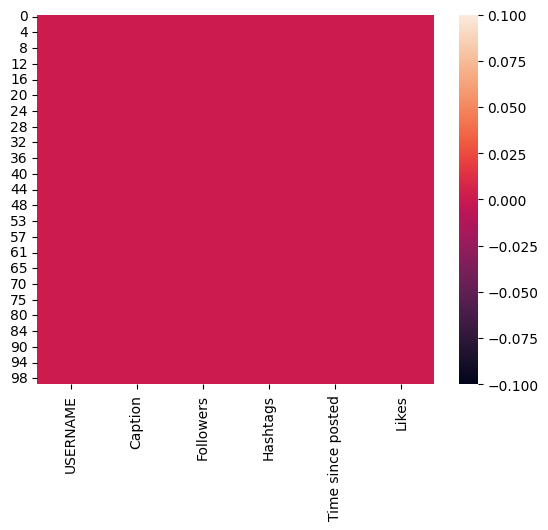

In [18]:
#plot heatmap
sns.heatmap(data.isnull())

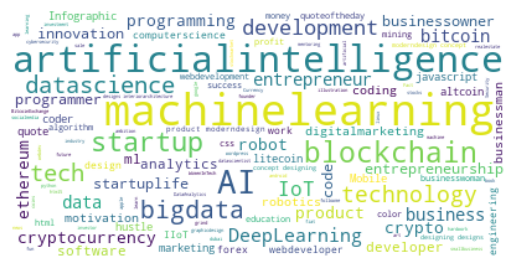

In [19]:
#import libraries from wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text=' '.join(i for i in data.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="White").generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
data.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [23]:
l=LabelEncoder()
data["USERNAME"]=l.fit_transform(data["USERNAME"])
data["Caption"]=l.fit_transform(data["Caption"])
data["Hashtags"]=l.fit_transform(data["Hashtags"])

In [24]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,61,86,1600,14,11 hours,139
1,28,82,880,91,2 hours,23
2,3,13,255,82,2 hours,25
3,67,89,340,61,3 hours,49
4,22,30,304,60,3 hours,30


In [25]:
data["Time since posted"]=data["Time since posted"].str.extract('(\d+)').astype(int)

In [26]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,61,86,1600,14,11,139
1,28,82,880,91,2,23
2,3,13,255,82,2,25
3,67,89,340,61,3,49
4,22,30,304,60,3,30


In [27]:
X=data.drop(labels=["Time since posted","Likes"],axis=1)

In [29]:
y=data[["Time since posted","Likes"]]

In [30]:
y.head()

,Time since posted,Likes
0,11,139
1,2,23
2,2,25
3,3,49
4,3,30


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [33]:
X_train.shape

(75, 4)

In [34]:
y_train.shape

(75, 2)

In [35]:
X_test.shape

(19, 4)

In [36]:
y_test.shape

(19, 2)

In [37]:
s=StandardScaler()

In [38]:
X_train_scaled=s.fit_transform(X_train)
X_test_scaled=s.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [40]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet()
}

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:
for i in range(len(models)):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Ridge()
Lasso()
ElasticNet()


In [43]:
def evaluate_models(act,pred):
    
    R2Score=r2_score(act,pred)
    MAE=mean_absolute_error(act,pred)
    MSE=mean_squared_error(act,pred)
    
    return R2Score,MAE,MSE

In [47]:
rscore=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    pred=model.predict(X_test)
    
    R2Score,MAE,MSE=evaluate_models(y_test,pred)
    
    rscore.append(R2Score)
    print(list(models.keys())[i])
    print("r2score= ",R2Score)
    print("MAE =",MAE)
    print("MSE =",MSE)
    print(50*"=")    

LinearRegression
r2score=  0.04788800048357511
MAE = 19.01821816432475
MSE = 1778.5900382078128
Ridge
r2score=  0.047888811794566666
MAE = 19.01819886163117
MSE = 1778.5944223946417
Lasso
r2score=  0.06368619584876112
MAE = 18.992054303651287
MSE = 1779.0799231042556
ElasticNet
r2score=  0.05596859158165629
MAE = 19.004421998620355
MSE = 1778.997988920816


In [67]:
eval_dict={key:value for value,key in zip(rscore,models.values())}

In [68]:
eval_dict

{LinearRegression(): 0.04788800048357511,
 Ridge(): 0.047888811794566666,
 Lasso(): 0.06368619584876112,
 ElasticNet(): 0.05596859158165629}

In [69]:
eval_dict.values()

dict_values([0.04788800048357511, 0.047888811794566666, 0.06368619584876112, 0.05596859158165629])

In [70]:
best_score=max(rscore)

In [71]:
for key,value in eval_dict.items():
    if value==best_score:
        best_model=key
        break

In [72]:
best_model.fit(X_train,y_train)

Lasso()

In [76]:
import pickle
with open ("Best_model.pkl","wb") as f:
    pickle.dump(best_model,f)